### Loading the Dataset
We will load in all our packages and our dataset all at once in the beginning.

In [89]:
# Loading all packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('spotify_history.csv')

# Display first rows of code
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


### Checking for Missing Data
Based on the first view of the dataset, this data is fairly simple in terms of columns as it explores basic data regarding people's Spotify listening history.
Now we check for null values in the dataset.

In [91]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

### Summary Statistics
There is a decent number of null values for the reason columns, so before deciding whether or not to remove them we are going to check the summary statistics to see the numeric values.

In [93]:
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


### Cleaning the Duplicate Data
The only null values are all in the reason columns and there is thousands of rows in this dataset, so we are dropping all duplicates so that there are unique values.

In [95]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert timestamps to simple datetime datatype
df['ts'] = pd.to_datetime(df['ts'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 148675 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  148675 non-null  object        
 1   ts                 148675 non-null  datetime64[ns]
 2   platform           148675 non-null  object        
 3   ms_played          148675 non-null  int64         
 4   track_name         148675 non-null  object        
 5   artist_name        148675 non-null  object        
 6   album_name         148675 non-null  object        
 7   reason_start       148532 non-null  object        
 8   reason_end         148558 non-null  object        
 9   shuffle            148675 non-null  bool          
 10  skipped            148675 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 11.6+ MB


### Creating Data Visualizations
Now, we will create some graphs to visually explore more about this Spotify dataset to see some potential trends.

#### Graph 1 (Top 10 Most Played Songs)
This is calculated by looking at the play count of the songs (number of times the song was played).

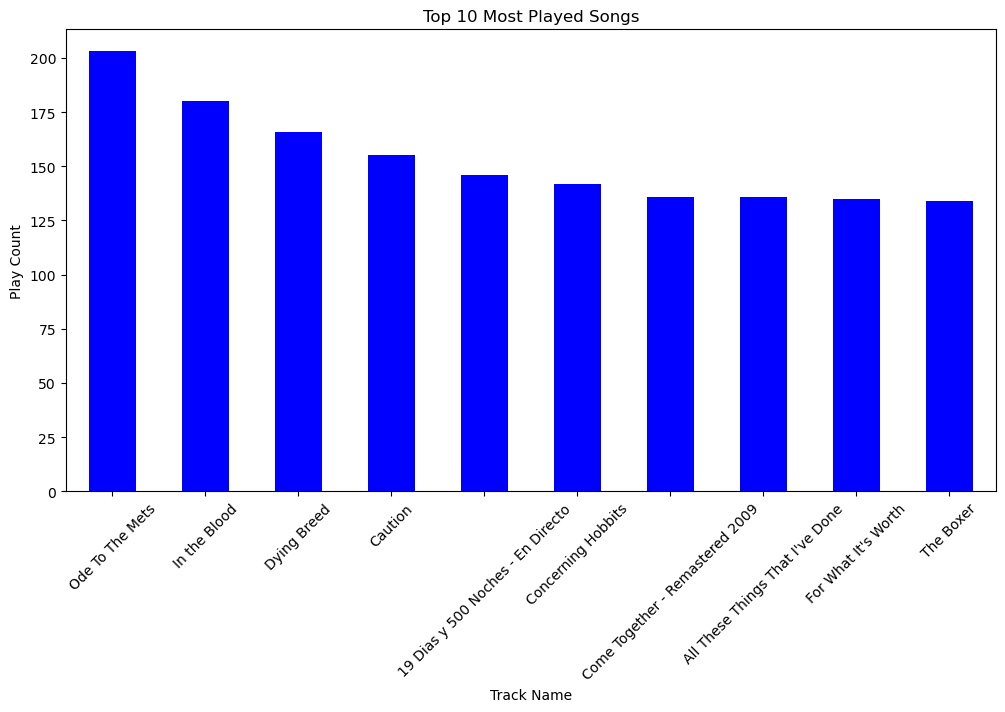

In [98]:
top_songs = df['track_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_songs.plot(kind='bar', color='blue')
plt.xlabel('Track Name')
plt.ylabel('Play Count')
plt.title('Top 10 Most Played Songs')
plt.xticks(rotation=45)
plt.show()


Ode To The Mets is the most played song in this dataset.

#### Graph 2 (Top Artists)
This is created by also using the play count, but for artists instead.

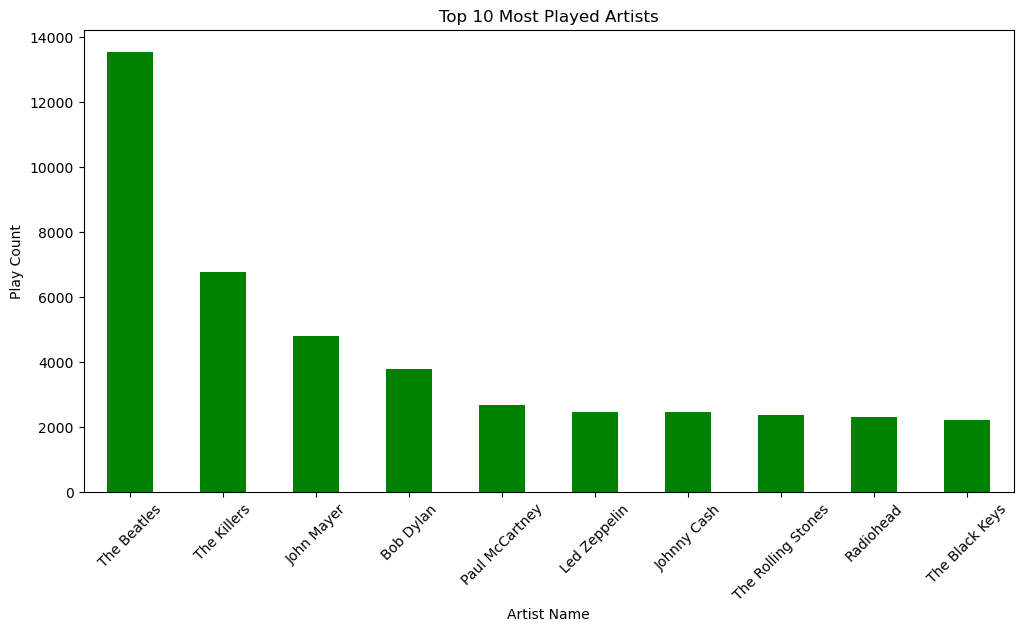

In [101]:
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_artists.plot(kind='bar', color='green')
plt.xlabel('Artist Name')
plt.ylabel('Play Count')
plt.title('Top 10 Most Played Artists')
plt.xticks(rotation=45)
plt.show()


The Beatles are the most played band (artist) in this dataset as well. (not very surprising)

#### Graph 3 (Hourly Listening Activity)
Now, let's see what hour in the day is the most popular for listening to music.

Since we already changed the ts (timestamp) column to datetime format, we will first need to extract the hour from the timestamp before continuing with the creation of the graph.

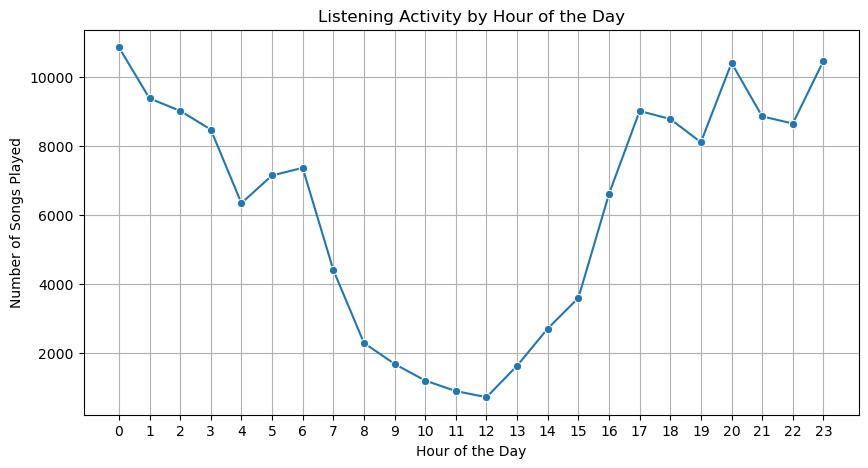

In [105]:
# Extract hour from timestamp
df['hour'] = df['ts'].dt.hour


# Count the number of plays per hour
hourly_activity = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_activity.index, y=hourly_activity.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Songs Played')
plt.title('Listening Activity by Hour of the Day')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


People seem to love listening to music the most at night.

### Understanding the Dataset
This dataset contains people's Spotify listening history, including track names, artist names, album names, and other basic columns as seen above.

#### Key Findings
Based on the graphs we created, we can see that <b>Ode To The Mets<b/> is the most played track in the dataset.

<b>The Beatles<b/> are the most played band in the dataset.

And that <b>people like listening to music at night the most.<b/>